# Jarvis Miller
# SI 650 HW 1

# Question 1

### Part A
- Precision: 8/16 = .5
- Recall: 8/10 = .4
- MAP: (1 + 2/3 + 3/5 + 4/6 + 5/10 + 6/11 + 7/14 + 8/10 + 0 + 0) / 10 = .52788
- $F_{1} = \frac{2PR}{P+R} =  \frac{2*.5*.8}{.13}$ = .615385


### Part B
- CG = 2 + 2 + 1 + 1 + 2 = 8
- DCG = $2 + 0 + \frac{2}{log_{2}(3)} + 0 + \frac{1}{log_{2}(5)} + \frac{1}{log_{2}(6)} + 0 + 0 + 0 + \frac{2}{log_{2}(10)}$ = 4.68145
- nDCG = $\frac{DCG}{IDCG} = \frac{4.68145}{6.19254} = .75598$
    - Where IDCG = $2 + \frac{2}{log_{2}(2)} + \frac{2}{log_{2}(3)} + \frac{1}{log_{2}(4)} + \frac{2}{log_{2}(5)} = 6.19254$

# Question 2

#### Part A
| Y|P(H=1;Y)| P(U=1;Y) | P(L=1;Y)| P(Y) |
|----: | ------ |:--------:| -------:|-----:|
| 1| 0.667   | 0.833    | .33     | .5   |
| 0| 0.333  | .5       |   .33    | .5  |


#### Part B
$P(Y=1|H=0, U=1, L=0) = \frac{P(Y=1, H=1, U=1, L=0)}{P(H=0, U=1, L=0|Y=0) + P(H=0, U=1, L=0|Y=0)}$
$= \frac{\frac{1}{12}} {(1-.33)(.5)(1-.33) + (1-.67)(.833)(1-.33)} = .3188$

Similarly, $P(Y=1|H=0, U=1, L=0) = \frac{\frac{1}{12}} {(1-.33)(.5)(1-.33) + (1-.67)(.833)(1-.33)} = .3188$

Based on this, we should not classify as spam since the probabilities are equal

#### Part C
Yes, the results are the same. This is because we created the conditional probabilities in the table using the 12 examples. They must be the same. 
$P(Y=1|H=0, U=1, L=0) = \frac{P(Y=1, H=1, U=1, L=0)}{P(H=0, U=1, L=0|Y=0) + P(H=0, U=1, L=0|Y=0)}$
$= \frac{\frac{1}{12}} {(2/3)(1/2)(2/3) + (1/3)(5/6)(2/3)} = .3188$


#### Part D
You have to follow the properties of a probability measure. For example, 
$P(H=0, U=1, L=0) = P(H=0, U=1, L=0|Y=0) + P(H=0, U=1, L=0|Y=1)$
$= P(H=0|Y=0)P(U=1|Y=0)P(L=0|Y=0) + P(H=0|Y=1)P(U=1|Y=1)P(L=0|Y=1)$

If we put all values = .999, then the sum would be greater than one. But $P:\Omega \to [0,1]$ so probabilities can't have a value greater than 1

#### Part E
Sure, make H=0 in row 2. This makes 

$P(Y=1|H=0, U=1, L=0) \frac{P(Y=1, H=1, U=1, L=0)}{P(H=0, U=1, L=0|Y=0) + P(H=0, U=1, L=0|Y=0)}$
$= \frac{\frac{1}{6}} {(2/3)(1/2)(2/3) + (1/2)(5/6)(2/3)} = .3316$

But, for $P(Y=0|H=0, U=1, L=0)$, the numerator is $\frac{1}{12}$ and the denominator is the same as above, so $P(Y=1|H=0, U=1, L=0) = 2*P(Y=0|H=0, U=1, L=0)$ meaning we categorize as spam

#### Part F
We would need 16 specifications, For $Y = 0$, we have U, L, H $\in$ {0,1}, So there are $2^3 = 8$ different combinations. Same for $Y = 1$ hence there are 16 specifications for $P(H, U, L| Y)$

#### Part F
Just because if you know whether a message is a spam or not, the event of a local number and the event of a long message isn't necessarily independent. Spam messages can come from local and non local numbers and be short or long, same for nonspam messages.

# Question 3

## Context
In this exercise, we are going to get our hands dirty and play with some data in the wild. Download two
collections from Canvas, ehr.txt and medhelp.txt. The first collection are sampled electronic health
records (de-identified) released in TREC CDS 2016, with 90 documents in total. The second collection are
sampled forum posts downloaded from MedHelp, with 180 documents in total. In both files, each line represents
a document. You can also find a stopword list in stoplist.txt.

In [215]:
import nltk
from collections import Counter
import string
import matplotlib.pyplot as plt
from six import text_type

nltk.download('punkt')
nltk.download("stopwords")
nltk.download('averaged_perceptron_tagger')

f = open("ehr.txt")
ehr = f.read()
f = open("medhelp.txt")
medhelp = f.read()
f = open("stoplist.txt")
stoplist = f.read().splitlines()
punc = set(string.punctuation)


[nltk_data] Downloading package punkt to /home/jarvis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jarvis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jarvis/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Part 1
Tokenize the text (e.g. use the nltk.word_tokenize() function in the NLTK package)
and compute the frequency of words. Then, plot the frequency distribution of words in each collection after the
removal of the stopwords: x-axis - word frequency (number of times a word appears in the collection); y-axis
-proportion of words with this frequency. Plot the distributions on a log-log scale. Does each plot look like a
power-law distribution? Are the two distributions similar or different?

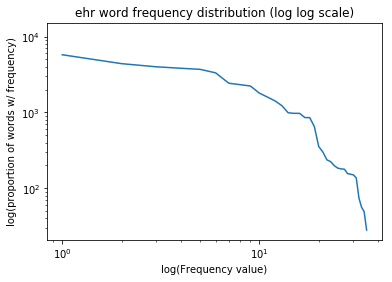

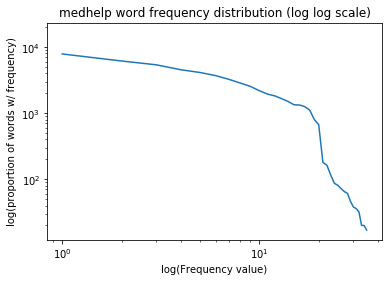

In [216]:
def plt_freq_dist(text, **kwargs):
    title  = kwargs.pop( 'title'  )
    xlabel = kwargs.pop( 'xlabel' )
    ylabel = kwargs.pop( 'ylabel' )
    important_words = filter(lambda x: x.lower() not in stoplist and x not in punc, text)
    fdist = Counter(important_words)
    samples = [item for item, _ in fdist.most_common()]
    freqs = [fdist[sample] for sample in samples]
    plt.loglog(freqs, **kwargs)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

enh_labs = {'title': 'ehr word frequency distribution (log log scale)', "xlabel": 'log(Frequency value)', 'ylabel': 'log(proportion of words w/ frequency)'}
medhelp_labs = {'title': 'medhelp word frequency distribution (log log scale)', "xlabel": 'log(Frequency value)', 'ylabel': 'log(proportion of words w/ frequency)'}

plt_freq_dist(ehr.lower(), **enh_labs)
plt_freq_dist(medhelp.lower(), **medhelp_labs)



### Discussion
The distributions look similar. In the medhelp document, there is a sharper drop in the log proportion of words with a certain frequency around log(freq) w/ value 100.

## Part 2
Now compare the two collections more rigorously. Report the following properties of each
collection. Can you explain these differences based on the nature of the two collections? (20 points) (You can
use the nltk.pos tag() function of the NLTK package for part of speech tagging.)
- (a) frequency of stopwords (percentage of the word occurrences that are stopwords.);
- (b) percentage of capital letters;
- (c) average number of characters per word;
- (d) percentage of nouns, adjectives, verbs, adverbs, and pronouns;
- (e) the top 10 nouns, top 10 verbs, and top 10 adjectives

#### frequency of stopwords

In [217]:
# enh text
counter_ehr = 0
counter_medhelp = 0
for stopword in stoplist:
    counter_ehr += ehr.lower().count(stopword)
    counter_medhelp += medhelp.lower().count(stopword)
print("enh frequency of stopwords:", str(counter_ehr / len(ehr)))
print("medhelp frequency of stopwords:", str(counter_medhelp / len(medhelp)))

enh frequency of stopwords: 0.3057645909926471
medhelp frequency of stopwords: 0.3557902025272633


#### percentage of capital letters

In [218]:
import re
print("percentage of capital letters in ehr:", len(re.findall('[A-Z]',ehr)) / len(ehr) * 100)
print("percentage of capital letters in medhelp:", len(re.findall('[A-Z]', medhelp)) / len(medhelp) * 100)

percentage of capital letters in ehr: 5.217428768382353
percentage of capital letters in medhelp: 2.6553574519646874


#### average number of characters per word

In [219]:
import numpy as np
ehr_words = nltk.word_tokenize(ehr)
med_words = nltk.word_tokenize(medhelp)

ehr_words = [word for word in ehr_words if word not in punc]
med_words = [word for word in med_words if word not in punc]

ehr_word_len = np.asarray([len(word) for word in ehr_words])
med_word_len = np.asarray([len(word) for word in med_words])
 
print("average number of chars per word for enh:", ehr_word_len.mean())
print("average number of chars per word for medhelp:", med_word_len.mean())

average number of chars per word for enh: 5.00125718391
average number of chars per word for medhelp: 4.14708389139


#### percentage of nouns, adjectives, verbs, adverbs, and pronouns;

In [220]:
def pos_dict(word_tokens):
    word_dict = {}
    pos_tokens = nltk.pos_tag(word_tokens)
    d = {"RB":0, "JJ": 0, "NN": 0, "PRP":0, "VB":0}

    def build_dict(item, category):
            d[category] += 1
            try:
                word_dict[category].append(item[0])
            except:
                word_dict[category] = []

    for item in pos_tokens:
        if "RB" in item[1]:
            build_dict(item, "RB")
        elif "JJ" in item[1]:
            build_dict(item, "JJ")
        elif "NN" in item[1]:
            build_dict(item, "NN")
        elif "PRP" in item[1]:
            build_dict(item, "PRP")
        elif "WP" in item[1]: # same as PRP
            build_dict(item, "PRP")
        elif "VB" in item[1]:
            build_dict(item, "VB")
        else:
            pass
    return d, word_dict


In [228]:
ehr_pos_dict, ehr_pos_words = pos_dict(ehr_words)
ehr_len = len(ehr_words)
for key, val in ehr_pos_dict.items():
    print("perc of %s in ehr is:" %key, val/ehr_len * 100)
print('\n')
medhelp_len = len(med_words)
med_pos_dict, med_pos_words = pos_dict(med_words)
for key, val in med_pos_dict.items():
    print("perc of {0} in medhelp is:".format(key), val/medhelp_len * 100)


perc of RB in ehr is: 3.4123563218390807
perc of JJ in ehr is: 11.350574712643677
perc of NN in ehr is: 37.96695402298851
perc of PRP in ehr is: 3.8882902298850572
perc of VB in ehr is: 14.520474137931034


perc of RB in medhelp is: 7.956897601363691
perc of JJ in medhelp is: 7.719469134299281
perc of NN in medhelp is: 21.435529039327893
perc of PRP in medhelp is: 11.70704979909899
perc of VB in medhelp is: 20.65018872519177


#### the top 10 nouns, top 10 verbs, and top 10 adjectives

In [222]:
for key, li in ehr_pos_words.items():
    print("top 10 {} words in ehr:\n".format(key), Counter(li).most_common(10))

top 10 NN words in ehr:
 [('pain', 67), ('patient', 48), ('No', 37), ('history', 30), ('ED', 29), ('home', 28), ('days', 25), ('Pt', 24), ('t', 22), ('BP', 21)]
top 10 VB words in ehr:
 [('was', 197), ('is', 70), ('had', 69), ('has', 55), ('were', 27), ('given', 26), ('have', 22), ('found', 22), ('be', 22), ('been', 21)]
top 10 JJ words in ehr:
 [('abdominal', 30), ('atrial', 25), ('right', 21), ('positive', 17), ('old', 17), ('past', 16), ('negative', 16), ('recent', 15), ('pulmonary', 14), ('last', 14)]
top 10 RB words in ehr:
 [('not', 45), ('also', 26), ('when', 16), ('then', 15), ('ago', 14), ('back', 12), ('Not', 11), ('recently', 11), ('prior', 10), ('well', 10)]
top 10 PRP words in ehr:
 [('She', 97), ('her', 74), ('she', 74), ('He', 57), ('he', 49), ('his', 34), ('who', 31), ('His', 5), ('Her', 3), ('it', 2)]


In [223]:
for key, li in med_pos_words.items():
    print("top 10 {} words in medhelp: \n".format(key), Counter(li).most_common(10))

top 10 PRP words in medhelp: 
 [('I', 474), ('you', 302), ('it', 226), ('my', 186), ('your', 107), ('me', 84), ('they', 66), ('he', 56), ('what', 49), ('It', 39)]
top 10 NN words in medhelp: 
 [('i', 72), ('time', 47), ('day', 28), ('people', 23), ('weeks', 22), ('days', 21), ('things', 21), ('pain', 21), ('doctor', 19), ('body', 18)]
top 10 VB words in medhelp: 
 [('is', 230), ('have', 187), ('are', 119), ('be', 116), ('was', 90), ('do', 86), ('get', 67), ('am', 57), ('had', 57), ('know', 47)]
top 10 RB words in medhelp: 
 [("n't", 110), ('not', 99), ('so', 76), ('just', 66), ('very', 51), ('really', 42), ('when', 38), ('now', 35), ('then', 34), ('back', 28)]
top 10 JJ words in medhelp: 
 [('i', 35), ('good', 27), ('other', 21), ('more', 19), ('sure', 19), ('normal', 17), ('long', 16), ('many', 15), ('low', 14), ('few', 13)]


## Part 3
We would like to summarize each document with a few words. However, picking the most
frequently used words in each document would be a bad idea, since they are more likely to appear in other
document as well. Instead, we pick the words with the highest TF-IDF weights in each document.
In this problem, term frequency (TF) and inverse document frequency (IDF) are defined as:
- *TF(t, d) = log(c(t, d) + 1)*
- *IDF(t) = 1 + log(N/k).*

c(t, d) is the frequency count of term t in doc d, N is the total number of documents in the collection, and k is
the document frequency of term t in the collection.
For each of the first 10 documents in the EHR collection, print out the 5 words that have the highest TF-IDF
weights.

In [224]:
import math
from textblob import TextBlob as tb

def tf(word, blob):
    return np.log(blob.words.count(word) + 1)

def idf(word, bloblist):
    N = len(bloblist)
    
    def num_occurances(word, bloblist):
        return (sum(1 for blob in bloblist if word in blob.words))
    
    return 1 + np.log(N / num_occurances(word, bloblist))

def tfidf(word, blob, bloblist):
    return tf(word, blob) * idf(word, bloblist)

with open('ehr.txt') as f:
    bloblist = [tb(next(f).lower()) for i in range(10)]
    
for i, blob in enumerate(bloblist):
    print("Top words in document {}".format(i + 1))
    scores = {word: tfidf(word, blob, bloblist) for word in blob.words}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:10]:
            print("\tWord: {}, TF-IDF: {}".format(word, round(score, 5)))



Top words in document 1
	Word: some, TF-IDF: 3.62826
	Word: he, TF-IDF: 2.42131
	Word: 78, TF-IDF: 2.28918
	Word: m, TF-IDF: 2.28918
	Word: transferred, TF-IDF: 2.28918
	Word: rehab, TF-IDF: 2.28918
	Word: cabg, TF-IDF: 2.28918
	Word: readmitted, TF-IDF: 2.28918
	Word: nqwmi, TF-IDF: 2.28918
	Word: melanotic, TF-IDF: 2.28918
Top words in document 2
	Word: elderly, TF-IDF: 2.28918
	Word: past, TF-IDF: 2.28918
	Word: aortic, TF-IDF: 2.28918
	Word: hyperlipidemia, TF-IDF: 2.28918
	Word: hip, TF-IDF: 2.28918
	Word: arthroplasty, TF-IDF: 2.28918
	Word: snap, TF-IDF: 2.28918
	Word: leg, TF-IDF: 2.28918
	Word: falling, TF-IDF: 2.28918
	Word: ground, TF-IDF: 2.28918
Top words in document 3
	Word: hypotension, TF-IDF: 3.62826
	Word: pt, TF-IDF: 3.61745
	Word: on, TF-IDF: 3.08415
	Word: she, TF-IDF: 2.93993
	Word: has, TF-IDF: 2.86676
	Word: day, TF-IDF: 2.86676
	Word: pain, TF-IDF: 2.65654
	Word: the, TF-IDF: 2.43084
	Word: a, TF-IDF: 2.42873
	Word: 75f, TF-IDF: 2.28918
Top words in document 4


In [225]:
with open('medhelp.txt') as f:
    bloblist = [tb(next(f)) for i in range(10)]
    
for i, blob in enumerate(bloblist):
    print("Top words in document {}".format(i + 1))
    scores = {word: tfidf(word, blob, bloblist) for word in blob.words}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:10]:
            print("\tWord: {}, TF-IDF: {}".format(word, round(score, 5)))



Top words in document 1
	Word: MD, TF-IDF: 3.62826
	Word: Your, TF-IDF: 2.28918
	Word: description, TF-IDF: 2.28918
	Word: sound, TF-IDF: 2.28918
	Word: like, TF-IDF: 2.28918
	Word: regular, TF-IDF: 2.28918
	Word: floater, TF-IDF: 2.28918
	Word: Since, TF-IDF: 2.28918
	Word: new, TF-IDF: 2.28918
	Word: problem, TF-IDF: 2.28918
Top words in document 2
	Word: BP, TF-IDF: 3.62826
	Word: your, TF-IDF: 2.42131
	Word: is, TF-IDF: 2.3472
	Word: certain, TF-IDF: 2.28918
	Word: weight, TF-IDF: 2.28918
	Word: loss, TF-IDF: 2.28918
	Word: want, TF-IDF: 2.28918
	Word: congratulate, TF-IDF: 2.28918
	Word: getting, TF-IDF: 2.28918
	Word: under, TF-IDF: 2.28918
Top words in document 3
	Word: Smoking, TF-IDF: 2.28918
	Word: effect, TF-IDF: 2.28918
	Word: octcome, TF-IDF: 2.28918
	Word: treatment, TF-IDF: 2.28918
	Word: Best, TF-IDF: 1.80872
	Word: will, TF-IDF: 1.52768
	Word: not, TF-IDF: 0.94038
	Word: of, TF-IDF: 0.94038
	Word: you, TF-IDF: 0.94038
	Word: to, TF-IDF: 0.84782
Top words in document 4


## Part 4
As discussed in the class, TF-IDF is a common way to weight the terms in each document. It
can also be easily calculated from the inverted index, since TF can be obtained from the postings and IDF can
be summarized as a dictionary. Could you think of another weighting that cannot be calculated directly from
inverted index? What is the advantage of such a weighting?